# Generation of statistics for heatwave indices using NOAA stations

Author: Martin Pavez

Creation: January 2025

Steps:
1. We read the indices HWN, HWF, HWD, HWM, HWA for each year and stations, produced by the previous notebook.
2. We produce the plots for the mean of California.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

In [2]:
os.chdir("../")
print(os.getcwd())

c:\Users\marti\Desktop\data\hw_extra


In [3]:
METADATA_PATH_AND_FILENAME = 'data/local_data/NOAA/stations.parquet'
TEMP_DATA_PATH = 'data/local_data/NOAA/original'
CLEANED_DATA_PATH = 'data/local_data/NOAA/cleaned_2/'
MY_FUNCTIONS_PATH = 'hugo/functions/'
PLOTS_FOLDER = 'PLOTS/'
# Add the folder to the Python path
folder_path = os.path.abspath(MY_FUNCTIONS_PATH)
sys.path.insert(0, folder_path)

from HWCompAndStats import (
    HW_statistics,
    HW_indices_summary,
    HW_stats_of_indices,
    plot_stats_of_hwi,
    plot_t_and_u_test_all_indices, 

)

## Code

In [4]:
# Reading raw data of selected stations

### stations are already selected
statlist_sorted = ['USC00040983', 'USC00041194', 'USC00041253', 'USC00040741', 'USC00040212', 'USC00040931', 'USC00041277', 'USC00041244', 'USC00040693', 'USC00040449']
stations = pd.DataFrame(index = statlist_sorted)

statlist = statlist_sorted.copy()
station_data_to_read = {}
stations_data = {}
for stat in statlist:
    stations_data[stat] = pd.read_parquet(CLEANED_DATA_PATH + f'Stat_{stat}.parquet')

stations = pd.DataFrame(index = statlist)

In [5]:
# MeteoChile
HWDef = {'Tind_type': 'max_temp',
        'Tcrit_dict': {'meas': 'perc',
                        'perc': 90,
                        'adj': 'adj',
                        'set': '',
                        'Tadd': 0,
                        'hist_data_temp': 'max_temp'
                        },
        'Nd': 3}

HWDef_dict = {}
HWDef_dict['MeteoChile'] = HWDef


start_year = 1971
end_year = 2023


ref_period = {}
ref_period['CDA'] = [1980, 2010] 

HW_indices = ['HWN', 'HWF', 'HWD', 'HWM', 'HWA']

hw_Cal_summary = HW_indices_summary(HWDef_dict, HW_indices, ref_period, stations, start_year, end_year, stations_data = stations_data)

station=USC00040983
hwdef=
MeteoChile
station=USC00041194
hwdef=
MeteoChile
station=USC00041253
hwdef=
MeteoChile
station=USC00040741
hwdef=
MeteoChile


c:\Users\marti\Desktop\data\hw_extra\hugo\functions\HWCompAndStats.py:412: RuntimeWarning: invalid value encountered in double_scalars
  hw_annual_stats['HWM'][year_to_analyze] = np.sum(np.array(hw_year['duration'], dtype=float)*np.array(hw_year['magnitude'], dtype=float))/np.sum(np.array(hw_year['duration'], dtype=float))


station=USC00040212
hwdef=
MeteoChile
station=USC00040931
hwdef=
MeteoChile


c:\Users\marti\Desktop\data\hw_extra\hugo\functions\HWCompAndStats.py:412: RuntimeWarning: invalid value encountered in double_scalars
  hw_annual_stats['HWM'][year_to_analyze] = np.sum(np.array(hw_year['duration'], dtype=float)*np.array(hw_year['magnitude'], dtype=float))/np.sum(np.array(hw_year['duration'], dtype=float))


station=USC00041277
hwdef=
MeteoChile


c:\Users\marti\Desktop\data\hw_extra\hugo\functions\HWCompAndStats.py:412: RuntimeWarning: invalid value encountered in double_scalars
  hw_annual_stats['HWM'][year_to_analyze] = np.sum(np.array(hw_year['duration'], dtype=float)*np.array(hw_year['magnitude'], dtype=float))/np.sum(np.array(hw_year['duration'], dtype=float))


station=USC00041244
hwdef=
MeteoChile


c:\Users\marti\Desktop\data\hw_extra\hugo\functions\HWCompAndStats.py:412: RuntimeWarning: invalid value encountered in double_scalars
  hw_annual_stats['HWM'][year_to_analyze] = np.sum(np.array(hw_year['duration'], dtype=float)*np.array(hw_year['magnitude'], dtype=float))/np.sum(np.array(hw_year['duration'], dtype=float))


station=USC00040693
hwdef=
MeteoChile


c:\Users\marti\Desktop\data\hw_extra\hugo\functions\HWCompAndStats.py:412: RuntimeWarning: invalid value encountered in double_scalars
  hw_annual_stats['HWM'][year_to_analyze] = np.sum(np.array(hw_year['duration'], dtype=float)*np.array(hw_year['magnitude'], dtype=float))/np.sum(np.array(hw_year['duration'], dtype=float))


station=USC00040449
hwdef=
MeteoChile


c:\Users\marti\Desktop\data\hw_extra\hugo\functions\HWCompAndStats.py:412: RuntimeWarning: invalid value encountered in double_scalars
  hw_annual_stats['HWM'][year_to_analyze] = np.sum(np.array(hw_year['duration'], dtype=float)*np.array(hw_year['magnitude'], dtype=float))/np.sum(np.array(hw_year['duration'], dtype=float))


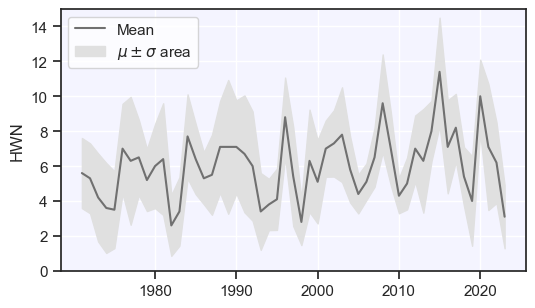

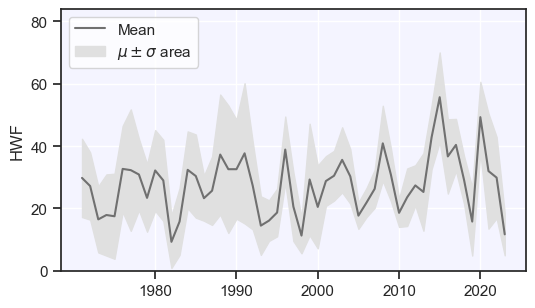

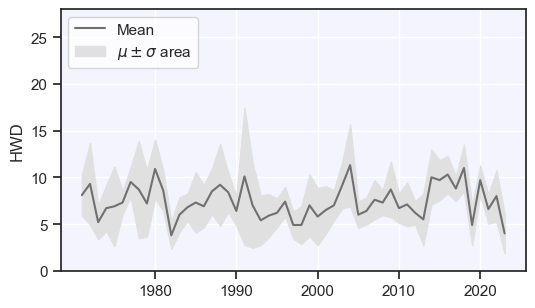

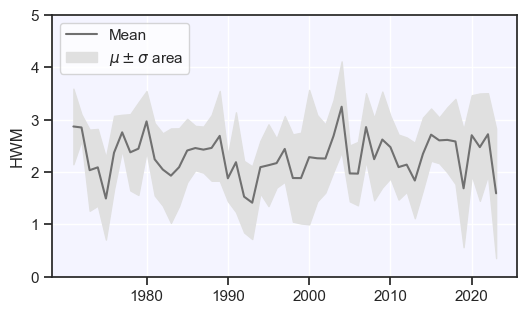

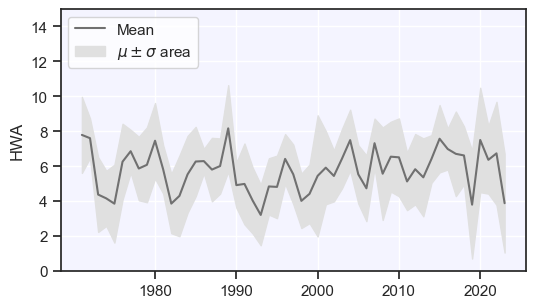

In [6]:
hwi_stats_Cal = HW_stats_of_indices(hw_Cal_summary)

hwdef = 'MeteoChile'
hwis = ['HWN', 'HWF', 'HWD', 'HWM', 'HWA']
stat = 'mean'

ymax = {'HWN': 15, 'HWF': 84, 'HWD': 28, 'HWM': 5, 'HWA': 15} #defined to be consistent with California ymax

for hwi in hwis:
    plot_stats_of_hwi(hwi_stats_Cal[hwdef], hwi, 'CDA', stat = stat, add_line = False,
                        saveplot = True, folder = PLOTS_FOLDER,
                        filename = hwdef + '_California.pdf', ymax = ymax[hwi])